In [630]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.model_selection import train_test_split

In [631]:
df = pd.read_csv('dirty_cafe_sales.csv')

In [632]:
df.shape

(10000, 8)

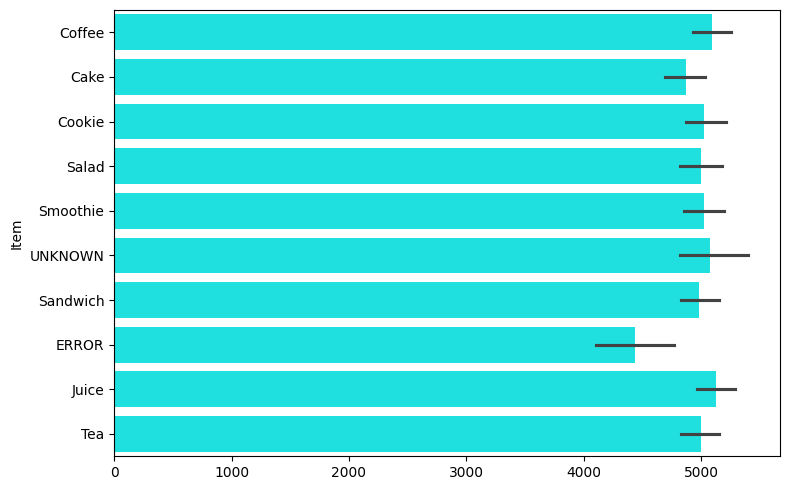

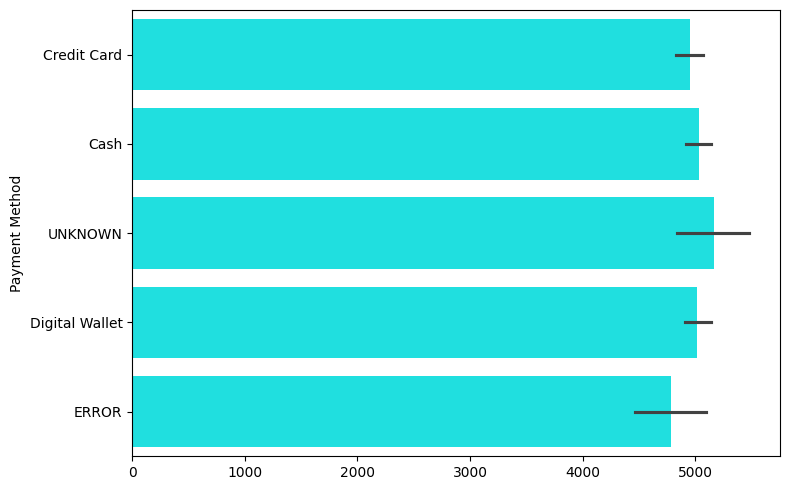

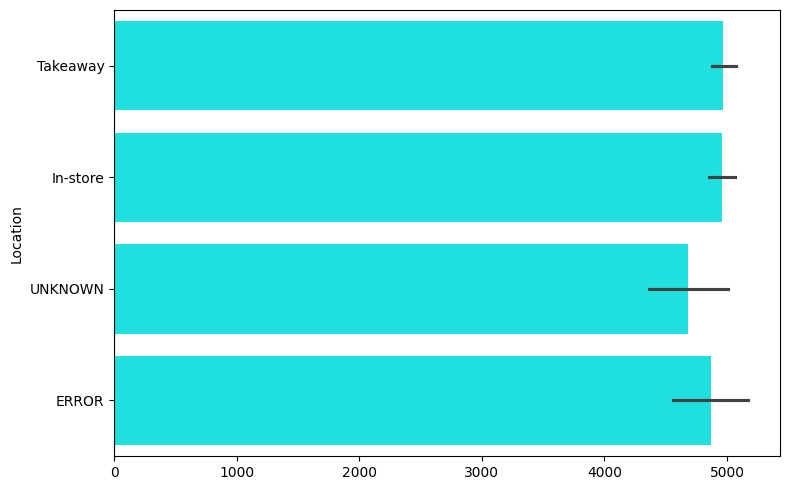

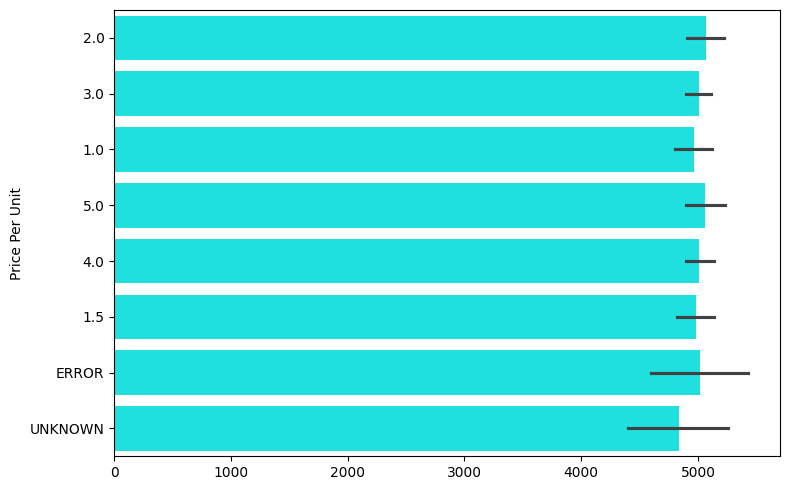

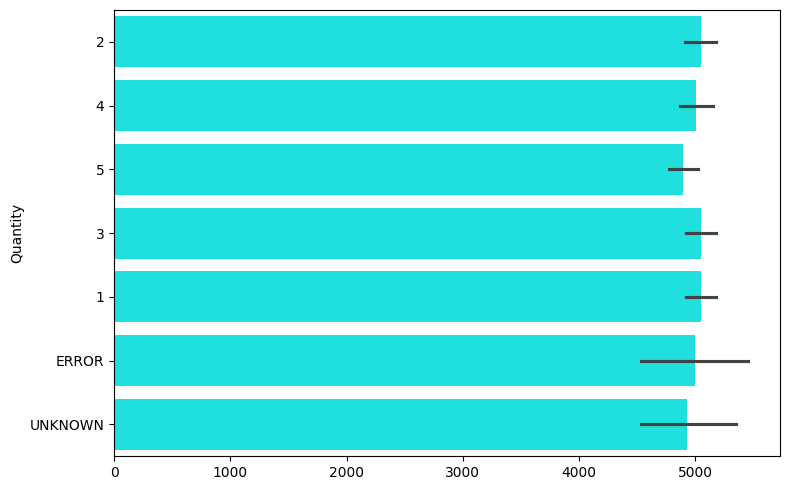

In [633]:
for i in ['Item','Payment Method','Location','Price Per Unit','Quantity']:
    plt.figure(figsize=(8,5))
    sns.barplot(df[i],color='cyan')
    plt.tight_layout()
    plt.show()

In [634]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [635]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [636]:
df.isnull().mean()

Transaction ID      0.0000
Item                0.0333
Quantity            0.0138
Price Per Unit      0.0179
Total Spent         0.0173
Payment Method      0.2579
Location            0.3265
Transaction Date    0.0159
dtype: float64

In [637]:
df.isnull().sum()

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [638]:
df.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_1961373,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [639]:
df['Payment Method'].unique()

array(['Credit Card', 'Cash', 'UNKNOWN', 'Digital Wallet', 'ERROR', nan],
      dtype=object)

In [640]:
df['Transaction ID'] = df['Transaction ID'].str.strip("TXN_")

In [641]:
df.isnull().sum()

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [642]:
a = 0
for i in df.columns:
    print(f'{i} : {(df[i] == 'ERROR').sum()}')
    a += (df[i] == 'ERROR').sum()
print(f"Total ERROR found : {a}")

Transaction ID : 0
Item : 292
Quantity : 170
Price Per Unit : 190
Total Spent : 164
Payment Method : 306
Location : 358
Transaction Date : 142
Total ERROR found : 1622


In [643]:
a = 0
for i in df.columns:
    print(f'{i} : {(df[i] == 'UNKNOWN').sum()}')
    a += (df[i] == 'UNKNOWN').sum()
print(f"Total UNKNOWN found : {a}")

Transaction ID : 0
Item : 344
Quantity : 171
Price Per Unit : 164
Total Spent : 165
Payment Method : 293
Location : 338
Transaction Date : 159
Total UNKNOWN found : 1634


In [644]:
df.sample(5)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
6394,9706608,Smoothie,1,4.0,4.0,Cash,UNKNOWN,2023-05-22
924,5007619,Cake,5,3.0,15.0,Credit Card,In-store,2023-07-05
1081,5583534,Cookie,2,1.0,2.0,Cash,Takeaway,2023-10-31
3347,2300313,Coffee,4,2.0,8.0,NaN,In-store,2023-06-02
4789,1133945,Smoothie,2,4.0,8.0,Digital Wallet,In-store,2023-10-23


In [645]:
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'],errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'],errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Total Spent'],errors='coerce')

In [646]:
df['Price Per Unit'].dtype,df['Quantity'].dtype,df['Total Spent'].dtype

(dtype('float64'), dtype('float64'), dtype('float64'))

In [ ]:
df['Price Per Unit'] = np.where(
                                    df['Price Per Unit'].isnull(),
                                    df['Total Spent']/df['Quantity'],
                                    df['Price Per Unit']
)

In [648]:
df['Price Per Unit'].isnull().sum()

np.int64(38)

In [ ]:
df['Total Spent'] = np.where(
                                    df['Total Spent'].isnull(),
                                    df['Price Per Unit']*df['Quantity'],
                                    df['Total Spent']
)

In [650]:
df['Price Per Unit'].isnull().sum()

np.int64(38)

In [ ]:
df['Quantity'] = np.where(
                                    df['Quantity'].isnull(),
                                    df['Total Spent']/df['Price Per Unit'],
                                    df['Quantity']
)

In [652]:
df['Quantity'].isnull().sum()

np.int64(38)

In [ ]:
df['Quantity_Imputed'] = (df['Quantity'].isna()).astype(int)
df['Price Per Unit_Imputed'] = (df['Price Per Unit'].isna()).astype(int)
df['Total Spent_Imputed'] = (df['Total Spent'].isna()).astype(int)

In [654]:
df # Tier 0

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Quantity_Imputed,Price Per Unit_Imputed,Total Spent_Imputed
0,1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08,0,0,0
1,4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16,0,0,0
2,4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19,0,0,0
3,7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27,0,0,0
4,3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,7672686,Coffee,2.0,2.0,4.0,NaN,UNKNOWN,2023-08-30,0,0,0
9996,9659401,NaN,3.0,1.0,3.0,Digital Wallet,NaN,2023-06-02,0,0,0
9997,5255387,Coffee,4.0,2.0,8.0,Digital Wallet,NaN,2023-03-02,0,0,0
9998,7695629,Cookie,3.0,1.0,3.0,Digital Wallet,NaN,2023-12-02,0,0,0


In [ ]:
df['Total Spent_Imputed'].unique(),df['Quantity_Imputed'].unique(),df['Price Per Unit_Imputed'].unique()

(array([0, 1]), array([0, 1]), array([0, 1]))

In [ ]:
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].mode()[0])

In [657]:
df['Quantity'].isnull().sum()

np.int64(0)

In [ ]:
conditions = [
    ( df['Price Per Unit_Imputed'] == 0  ),
    ( (df['Price Per Unit_Imputed'] == 1) & (df['Quantity_Imputed'] == 0)  ),
    ( (df['Price Per Unit_Imputed'] == 1) & (df['Quantity_Imputed'] == 1)  )
]
choices = [0,1,2]
df['Price Tier'] = np.select(condlist=conditions , choicelist=choices , default=0)

In [ ]:
df['Price Per Unit'] = np.where(
                                    df['Price Per Unit'].isna(),
                                    df['Total Spent']/df['Quantity'],
                                    df['Price Per Unit']
)

In [660]:
df['Price Per Unit'].isnull().sum()

np.int64(20)

In [ ]:
conditions = [
    ( df['Total Spent_Imputed'] == 0  ),
    ( (df['Total Spent_Imputed'] == 1) & (df['Price Per Unit_Imputed'] == 0) & (df['Quantity_Imputed'] == 1)  ),
    ( (df['Total Spent_Imputed'] == 1) & (df['Price Per Unit_Imputed'] == 1) & (df['Quantity_Imputed'] == 0)  ),
    ( (df['Total Spent_Imputed'] == 1) & (df['Price Per Unit_Imputed'] == 1) & (df['Quantity_Imputed'] == 1)  )
]
choices = [0,2,2,3]
df['Total Spent Tier'] = np.select(condlist=conditions , choicelist=choices , default=1)

In [662]:
df['Total Spent Tier'].unique()

array([0, 2])

In [ ]:
df['Total Spent'] = np.where(
                                    df['Total Spent'].isnull(),
                                    df['Price Per Unit']*df['Quantity'],
                                    df['Total Spent']
)

In [664]:
df['Total Spent'].isnull().sum()

np.int64(20)

In [665]:
price_per_unit_missing = df['Price Per Unit'].isna()

In [ ]:
df.loc[price_per_unit_missing,'Price Tier'] = 1 

In [ ]:
df['Price Per Unit'] = df['Price Per Unit'].fillna(df['Price Per Unit'].mode()[0])

In [668]:
df['Price Per Unit'].isnull().sum()

np.int64(0)

In [ ]:
conditions = [
    ( df['Total Spent_Imputed'] == 0  ),
    ( (df['Total Spent_Imputed'] == 1) & (df['Price Tier'] == 0) & (df['Quantity_Imputed'] == 1)  ),
    ( (df['Total Spent_Imputed'] == 1) & (df['Price Tier'] == 1) & (df['Quantity_Imputed'] == 0)  ),
    ( (df['Total Spent_Imputed'] == 1) & (df['Price Tier'] == 1) & (df['Quantity_Imputed'] == 1)  )
]
choices = [0,2,2,3]
df['Total Spent Tier'] = np.select(condlist=conditions , choicelist=choices , default=1)

In [ ]:
df['Total Spent'] = np.where(
                                    df['Total Spent'].isnull(),
                                    df['Price Per Unit']*df['Quantity'],
                                    df['Total Spent']
)

In [672]:
df['Total Spent'].isna().sum()

np.int64(0)

In [671]:
df['Total Spent Tier'].unique()

array([0, 2])

In [674]:
df.isna().sum()

Transaction ID               0
Item                       333
Quantity                     0
Price Per Unit               0
Total Spent                  0
Payment Method            2579
Location                  3265
Transaction Date           159
Quantity_Imputed             0
Price Per Unit_Imputed       0
Total Spent_Imputed          0
Price Tier                   0
Total Spent Tier             0
dtype: int64

In [683]:
df['Quantity_Tier'] = df['Quantity_Imputed']

In [684]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Quantity_Imputed,Price Per Unit_Imputed,Total Spent_Imputed,Price Tier,Total Spent Tier,Quantity_Tier
0,1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08,0,0,0,0,0,0
1,4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16,0,0,0,0,0,0
2,4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19,0,0,0,0,0,0
3,7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27,0,0,0,0,0,0
4,3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7672686,Coffee,2.0,2.0,4.0,NaN,UNKNOWN,2023-08-30,0,0,0,0,0,0
9996,9659401,NaN,3.0,1.0,3.0,Digital Wallet,NaN,2023-06-02,0,0,0,0,0,0
9997,5255387,Coffee,4.0,2.0,8.0,Digital Wallet,NaN,2023-03-02,0,0,0,0,0,0
9998,7695629,Cookie,3.0,1.0,3.0,Digital Wallet,NaN,2023-12-02,0,0,0,0,0,0
